In [1]:
%load_ext nb_black
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.utils import shuffle
from collections import Counter

<IPython.core.display.Javascript object>

In [2]:
data = pd.read_csv("./training.1600000.processed.noemoticon.csv")

<IPython.core.display.Javascript object>

In [3]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


<IPython.core.display.Javascript object>

In [4]:
data.columns = ["target", "ids", "date", "flag", "user", "text"]

<IPython.core.display.Javascript object>

In [5]:
data = shuffle(data)

<IPython.core.display.Javascript object>

In [6]:
data["text"].nunique()

1581465

<IPython.core.display.Javascript object>

In [7]:
data.loc[data["target"] == 4, "target"] = 1

<IPython.core.display.Javascript object>

In [8]:
data = data[:10000]

<IPython.core.display.Javascript object>

In [9]:
data["target"].value_counts()

1    5075
0    4925
Name: target, dtype: int64

<IPython.core.display.Javascript object>

In [10]:
data.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [11]:
data.head()

,target,ids,date,flag,user,text
0,0,2252410706,Sat Jun 20 06:12:23 PDT 2009,NO_QUERY,laura3lizab3th,Ooh damn you @izzyreed for making me wana stre...
1,1,2188973513,Mon Jun 15 22:57:56 PDT 2009,NO_QUERY,hannahgar12,I jus got my hair dyed. I.ll put up a pic tomo...
2,0,2189965326,Tue Jun 16 01:23:19 PDT 2009,NO_QUERY,chellybelle,@Honey3223 Work and school I've missed throwi...
3,1,1794908780,Thu May 14 06:47:51 PDT 2009,NO_QUERY,Anjeebaby,@disil429 We women and men need time out somet...
4,1,2064646859,Sun Jun 07 06:49:28 PDT 2009,NO_QUERY,bobvodka,Another quality F1 race


<IPython.core.display.Javascript object>

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  10000 non-null  int64 
 1   ids     10000 non-null  int64 
 2   date    10000 non-null  object
 3   flag    10000 non-null  object
 4   user    10000 non-null  object
 5   text    10000 non-null  object
dtypes: int64(2), object(4)
memory usage: 468.9+ KB


<IPython.core.display.Javascript object>

In [13]:
data.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

<IPython.core.display.Javascript object>

In [14]:
data["flag"].value_counts()

NO_QUERY    10000
Name: flag, dtype: int64

<IPython.core.display.Javascript object>

In [15]:
data["target"].value_counts()

1    5075
0    4925
Name: target, dtype: int64

<IPython.core.display.Javascript object>

In [16]:
data.drop(["flag", "date", "ids"], axis=1)

,target,user,text
0,0,laura3lizab3th,Ooh damn you @izzyreed for making me wana stre...
1,1,hannahgar12,I jus got my hair dyed. I.ll put up a pic tomo...
2,0,chellybelle,@Honey3223 Work and school I've missed throwi...
3,1,Anjeebaby,@disil429 We women and men need time out somet...
4,1,bobvodka,Another quality F1 race
...,...,...,...
9995,1,jennygirl7,@mynameismo *hugs back* Hope you stay unsoggy...
9996,0,ikkhan,longing for the weekend to catch up with some ...
9997,0,spoonerist,@unicornology It makes me sad But that doesn'...
9998,0,WranglerRish,Searching for more tunes for Greeley Grays hom...


<IPython.core.display.Javascript object>

In [17]:
train, test = train_test_split(data, test_size=0.1)

<IPython.core.display.Javascript object>

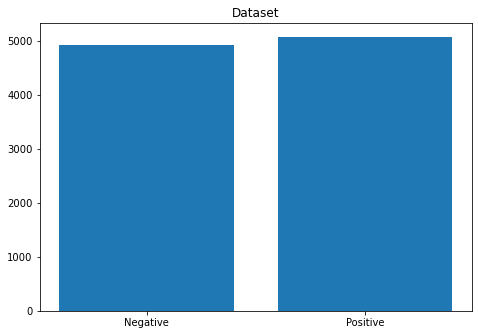

<IPython.core.display.Javascript object>

In [18]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
sentiment = ["Negative", "Positive"]
sentimentcount = [
    len(data[data["target"] == 0].index),
    len(data[data["target"] == 1].index),
]
ax.bar(sentiment, sentimentcount)
plt.title("Dataset")
plt.show()

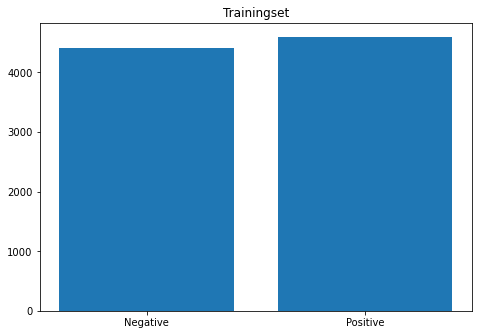

<IPython.core.display.Javascript object>

In [19]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
sentiment = ["Negative", "Positive"]
sentimentcount = [
    len(train[train["target"] == 0].index),
    len(train[train["target"] == 1].index),
]
ax.bar(sentiment, sentimentcount)
plt.title("Trainingset")
plt.show()

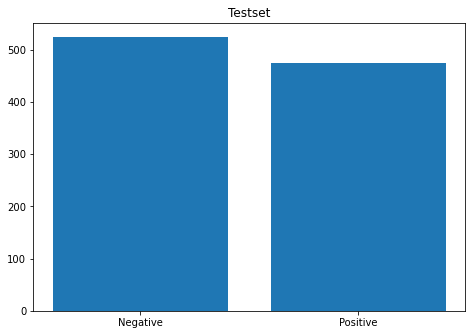

<IPython.core.display.Javascript object>

In [20]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
sentiment = ["Negative", "Positive"]
sentimentcount = [
    len(test[test["target"] == 0].index),
    len(test[test["target"] == 1].index),
]
ax.bar(sentiment, sentimentcount)
plt.title("Testset")
plt.show()

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 8963 to 4775
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  9000 non-null   int64 
 1   ids     9000 non-null   int64 
 2   date    9000 non-null   object
 3   flag    9000 non-null   object
 4   user    9000 non-null   object
 5   text    9000 non-null   object
dtypes: int64(2), object(4)
memory usage: 492.2+ KB


<IPython.core.display.Javascript object>

In [22]:
positive = train[train["target"] == 1]
positive = positive["text"]
negative = train[train["target"] == 0]
negative = negative["text"]

<IPython.core.display.Javascript object>

In [23]:
positive.head()

8963                              @gaylondon Good night! 
8081              @mollycoonrod I think you should spill 
3000    @JoelMadden i dont mind delivering coffee bean...
5122    McD's by the lake with the gurlz @SonyaTeclai ...
1120    Hope every1 is havin a good time in NYC for th...
Name: text, dtype: object

<IPython.core.display.Javascript object>

In [24]:
def wordcloud(data, color):
    words = " ".join(data)
    cleanedword = " ".join(
        [
            word
            for word in words.split()
            if "http" not in word
            and not word.startswith("@")
            and not word.startswith("#")
            and word != "RT"
        ]
    )
    wordcloud = WordCloud(
        stopwords=STOPWORDS, background_color=color, width=2500, height=2000
    ).generate(cleanedword)
    plt.figure(1, figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>

Positive Words


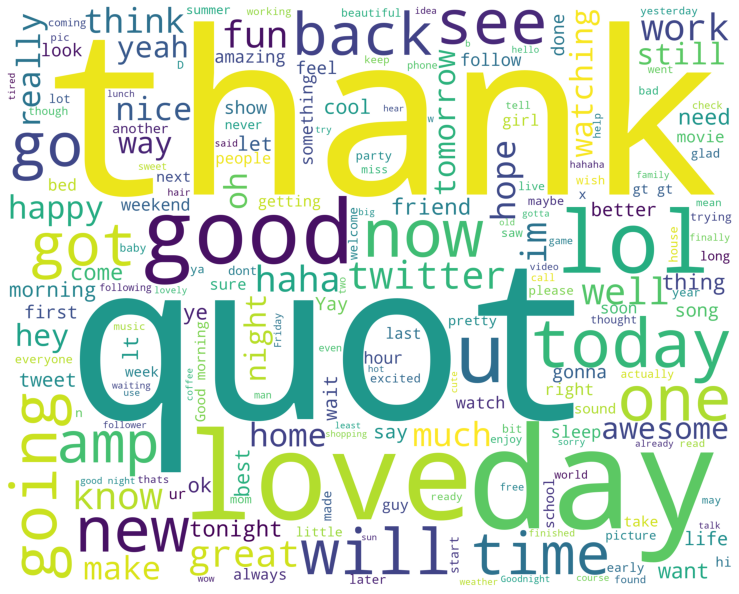

Negative Words


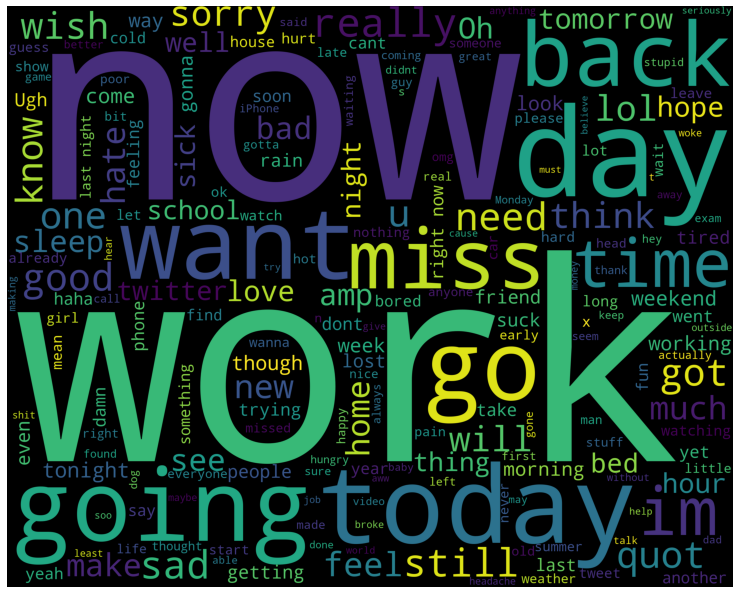

<IPython.core.display.Javascript object>

In [25]:
print("Positive Words")
wordcloud(positive, "white")
print("Negative Words")
wordcloud(negative, "black")

In [26]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    cleanedword = [
        word
        for word in words_filtered
        if "http" not in word
        and not word.startswith("@")
        and not word.startswith("#")
        and word != "RT"
    ]
    words_without_stopwords = [
        word for word in cleanedword if not word in stopwords_set
    ]
    tweets.append((words_without_stopwords, row.target))

testpos = test[test["target"] == 1]
testpos = testpos["text"]
testneg = test[test["target"] == 0]
testneg = testneg["text"]

<IPython.core.display.Javascript object>

In [27]:
def get_words_in_tweets(tweets):
    all = []
    for (words, target) in tweets:
        all.extend(words)
    return all


def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features


w_features = get_word_features(get_words_in_tweets(tweets))


def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features["contains(%s)" % word] = word in document_words
    return features

<IPython.core.display.Javascript object>

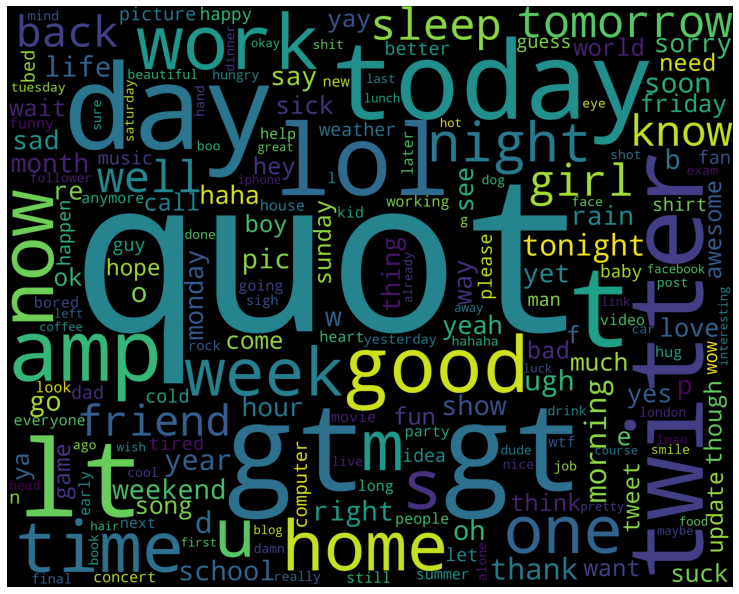

<IPython.core.display.Javascript object>

In [28]:
wordcloud(w_features, "black")

In [29]:
training_set = nltk.classify.apply_features(extract_features, tweets)

<IPython.core.display.Javascript object>

In [30]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

<IPython.core.display.Javascript object>

In [31]:
classifier

<IPython.core.display.Javascript object>

In [32]:
neg_cnt = 0
pos_cnt = 0
for obj in testneg:
    res = classifier.classify(extract_features(obj.split()))
    if res == 0:
        neg_cnt = neg_cnt + 1
for obj in testpos:
    res = classifier.classify(extract_features(obj.split()))
    if res == 1:
        pos_cnt = pos_cnt + 1

<IPython.core.display.Javascript object>

In [33]:
percentneg = round((neg_cnt / len(testneg)) * 100)
percentpos = round((pos_cnt / len(testpos)) * 100)
print("Negative Accuracy : ", percentneg, "%")
print("Positive Accuracy : ", (percentpos), "%")

Negative Accuracy :  65 %
Positive Accuracy :  73 %


<IPython.core.display.Javascript object>

In [34]:
obj = input("Enter the Tweet/Sentence : ")

Enter the Tweet/Sentence : no way this happened 


<IPython.core.display.Javascript object>

In [35]:
res = classifier.classify(extract_features(obj.split()))

<IPython.core.display.Javascript object>

In [36]:
if res == 0:
    print("Negative Statement")
else:
    print("Positive Statement")

Negative Statement


<IPython.core.display.Javascript object>